### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Read Dataset 

In [3]:
path_file = 'dataset/imdb_indonesian_movies.csv'

df = pd.read_csv(path_file)
df

,judul_film,ringkasan_sinopsis,genre
0,Sunan Kalijaga,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Gie,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL Movie,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Sang pencerah,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama
...,...,...,...
1000,Winter in Tokyo,Winter in Tokyo berpusat pada kehidupan Ishida...,Romantis
1001,Petualang Cinta,Markonah melarikan diri ke Jakarta karena akan...,Romantis
1002,Last Night (III),"Tempat aking lebih dari 36 jam, Last Night ada...",Romantis
1003,Path of Light,Proyek baru ini adalah tentang seorang lelaki ...,Romantis


In [4]:
df.genre.value_counts()

genre
Drama       202
Laga        202
Komedi      201
Horor       200
Romantis    200
Name: count, dtype: int64

In [5]:
category = pd.get_dummies(df.genre).astype(int)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru.head()

,judul_film,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Sunan Kalijaga,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Gie,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL Movie,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Sang pencerah,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0


In [6]:
sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama','Horor'	,'Komedi','Laga', 'Romantis']].values

### Split Dataset

In [7]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

### Train Model

In [8]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih)
tokenizer.fit_on_texts(sinopsis_test)

sequence_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sequence_test = tokenizer.texts_to_sequences(sinopsis_test)

max_length = 200
padded_latih = pad_sequences(sequence_latih, maxlen=max_length)
padded_test = pad_sequences(sequence_test, maxlen=max_length)

In [9]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [10]:
num_epochs = 10

history = model.fit(padded_latih, label_latih,
                    epochs=num_epochs, validation_data=(padded_test, label_test), verbose=2)

Epoch 1/10
26/26 - 11s - loss: 1.6101 - accuracy: 0.1928 - val_loss: 1.6122 - val_accuracy: 0.1592 - 11s/epoch - 418ms/step
Epoch 2/10
26/26 - 0s - loss: 1.6016 - accuracy: 0.2400 - val_loss: 1.6116 - val_accuracy: 0.1741 - 490ms/epoch - 19ms/step
Epoch 3/10
26/26 - 0s - loss: 1.5217 - accuracy: 0.3470 - val_loss: 1.6294 - val_accuracy: 0.1692 - 447ms/epoch - 17ms/step
Epoch 4/10
26/26 - 0s - loss: 1.2215 - accuracy: 0.4502 - val_loss: 1.8466 - val_accuracy: 0.2338 - 448ms/epoch - 17ms/step
Epoch 5/10
26/26 - 1s - loss: 0.8548 - accuracy: 0.6679 - val_loss: 2.1398 - val_accuracy: 0.2537 - 506ms/epoch - 19ms/step
Epoch 6/10
26/26 - 1s - loss: 0.5493 - accuracy: 0.8047 - val_loss: 2.9208 - val_accuracy: 0.2488 - 501ms/epoch - 19ms/step
Epoch 7/10
26/26 - 0s - loss: 0.3267 - accuracy: 0.8955 - val_loss: 3.2345 - val_accuracy: 0.2786 - 478ms/epoch - 18ms/step
Epoch 8/10
26/26 - 0s - loss: 0.1665 - accuracy: 0.9577 - val_loss: 3.7299 - val_accuracy: 0.2786 - 482ms/epoch - 19ms/step
Epoch 9/

### Test Model

In [11]:
sinopsis_latih[1]

'Kisah ini terentang sepanjang 21 tahun. Dan dalam waktu yang sekian panjang itu, peristiwa-peristiwa yang fantastis terjadi. Semarang 1966. Roy Paturungi (Deddy Mizwar), anak yatim, marah besar karena ujian dari dosen Handoko (Pitrajaya Burnama) tidak pernah lulus. Handoko mempunyai sentimen khusus, karena Roy saling cinta dengan anaknya Paramita (Sophia Latjuba) yang sudah ditinggal ibunya. Handoko tidak ingin anaknya lepas dari dirinya. Ia sangat posesif. Kemarahan Roy dilampiaskan dengan merusak mobil Handoko, hingga ia masuk penjara dua tahun. Keluar dari penjara, ia disembunyikan beberapa hari di kamar Paramita. Lalu menghilang. Hasilnya Paramita mengandung dan ketika tahu, Handoko terguncang dan meninggal. Dalam keadaan terguncang pula, Paramita melahirkan bayi kembar laki-laki. Ia menolak kehadiran bayi itu, karena dianggap penyebab mati ayahnya. Maka atas prakarsa dokter keluarga, dr. Alim (Henky Solaiman) dan rekan psikiaternya, kedua bayi itu diusahakan di adopsi oleh dua ke

In [12]:
padded_latih[1]

array([ 379,    2, 4312,  113, 3484, 4312,  893, 4312,  894, 2506,   20,
       1423,  242,  156,   14, 1740,    8, 1105, 1106, 4277, 3485,   10,
         98,  632, 1106,  318, 4312,  759,   14,  893,  209,   35,    5,
        160, 3486, 2925, 2926,    2,   50, 1021,   80, 1106,   10,   69,
        160,  450,    8,  122,   11,   59, 4312, 2507,  893, 4312,    5,
       2204,  217, 1106,   64,   11,  168,  343,  108,   58,  250,    8,
        343,   11, 3487,  200,   61,    4,  369, 3486,   75,  805, 3488,
       3486, 1941,    3,   28,  117, 1106, 1565,    3,  120,   17,  277,
       1565,  573, 3486, 1022,  601, 2508,  184,  184,   11,  370,  699,
        601,    9,   14,  394, 1424,  220,   81,  155,  146, 4312,  264,
         68,  665, 4312, 4312, 4312,    3,  700, 4312,  201,  601,    9,
       4312,    4, 4312,   16,  108,   68,  252,   91, 4312,  108,  601,
          9,   18, 1023,  854, 1741,  156,   17,   68,  666,    3, 4278,
       1566, 1567,  477,   17,   68,  962,   56,  2

In [13]:
label_latih[1]

array([0, 0, 0, 1, 0])

In [14]:
def prediksi(text):
  text_sequence = tokenizer.texts_to_sequences(text)

  text_padded = pad_sequences(text_sequence, maxlen=200)
  return text_padded

In [15]:
predict = model.predict(prediksi([sinopsis_latih[1]]))
predict

1/1 [==============================] - 0s 369ms/step


array([[1.1311138e-05, 1.4572903e-07, 6.1281334e-04, 9.9937576e-01,
        3.9473494e-11]], dtype=float32)

In [16]:
import numpy as np

np.argmax(predict)

3

### Evaluation

In [17]:
from sklearn.metrics import confusion_matrix

# Prediksi kelas untuk data uji
y_pred = model.predict(padded_test)

# Konversi prediksi probabilitas menjadi kelas
y_pred_classes = np.argmax(y_pred, axis=1)

# Konversi label validasi ke kelas
y_true = np.argmax(label_test, axis=1)


# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

7/7 [==============================] - 0s 14ms/step


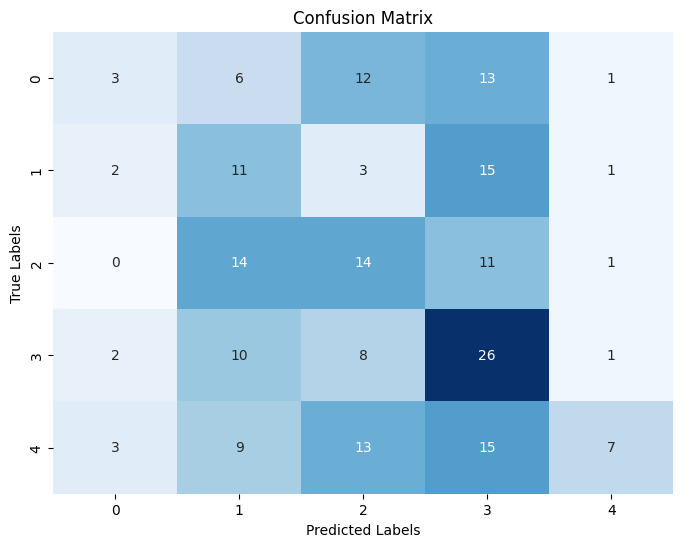

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(5), yticklabels=range(5))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
